# Exploring Dandiset 001195: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State

**Important:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or scientific results. Review all steps and methodologies critically before drawing conclusions from any analyses or visualizations.

## Overview
This notebook introduces and explores data from [Dandiset 001195, version 0.250408.1733](https://dandiarchive.org/dandiset/001195/0.250408.1733), which supports the publication:

Keyes, Laurel; Lee, Christopher R.; Wichmann, Romy; Matthews, Gillian A.; Tye, Kay M. (2025) *Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State* (Version 0.250408.1733) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001195/0.250408.1733

**Dataset Description:**  
The dataset includes in vivo calcium imaging data, behavioral videos, and ex vivo patch-clamp electrophysiology recordings from the dorsal raphe nucleus (DRN) and related mouse brain regions.  
Experiments address neural correlates of loneliness, focusing on optogenetics, social motivation, and dopamine neuron function in various brain regions.

**Notebook contents:**  
- Dandiset metadata and asset exploration  
- Loading and inspecting NWB files with PyNWB  
- Exploring current clamp and stimulus series  
- Simple visualizations of electrophysiological responses  
- Suggestions for next steps

**Required packages:**  
- dandi
- pynwb
- h5py
- remfile
- numpy
- pandas
- matplotlib
- seaborn

All packages are assumed to be installed.

## 1. Exploring the Dandiset and Listing Files

Let's use the DANDI API to connect to the archive and list a few files in this Dandiset. This step helps the user get familiar with the overall dataset structure.

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive and get Dandiset metadata
client = DandiAPIClient()
dandiset = client.get_dandiset("001195", "0.250408.1733")

metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata.get('url', 'https://dandiarchive.org/dandiset/001195/0.250408.1733')}")

# List first 5 assets
assets = dandiset.get_assets()
print("\nFirst 5 assets in this Dandiset:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State
Dandiset URL: https://dandiarchive.org/dandiset/001195/0.250408.1733

First 5 assets in this Dandiset:
- sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb (ID: a243dde4-c270-42a9-8550-025f5ffcd5a7)
- sub-23/sub-23_ses-20150324T161217_slice-slice-2_cell-B3_icephys.nwb (ID: 8c1155c8-4531-4625-9515-e399f1b5f7bc)
- sub-235/sub-235_ses-20200921T142415_slice-slice-1_cell-C3_icephys.nwb (ID: da3bb7c6-cd57-4c1a-92aa-2be38419088c)
- sub-23/sub-23_ses-20150324T154615_slice-slice-2_cell-B2_icephys.nwb (ID: 85bf2dfb-0e2f-442d-b11c-e0d38bcc8783)
- sub-23/sub-23_ses-20150324T152016_slice-slice-2_cell-B1_icephys.nwb (ID: 1bbc22a8-059d-4cd2-80c6-e1c20969ab19)


## 2. Selecting and Loading an NWB File

We'll demonstrate analysis on the following file:

**Path:** `sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb`  
**DANDI asset ID:** `a243dde4-c270-42a9-8550-025f5ffcd5a7`  
**Download URL:**  
https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/

[View this file on NeuroSIFT](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/&dandisetId=001195&dandisetVersion=draft)

We will now load this file remotely (the data is streamed, so loading large arrays can be slow) and inspect its contents.

In [2]:
import pynwb
import h5py
import remfile

# Load NWB file
url = "https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print(f"File identifier: {nwb.identifier}")
print(f"Session description: {nwb.session_description}")
print(f"Experimenter(s): {nwb.experimenter}")
print(f"Session start: {nwb.session_start_time}")
print(f"Institution: {nwb.institution}")
print(f"Lab: {nwb.lab}")

File identifier: a18b081c-3b63-45df-b702-fc3640aef3de
Session description: episodic stimulation
Experimenter(s): ('Matthews, Gillian',)
Session start: 2015-03-24 13:41:14-07:00
Institution: Massachusetts Institute of Technology
Lab: Kay Tye Lab


### Summary of NWB File Structure

**Subject info:**

- ID: `{}`  
- Sex: `{}`  
- Age: `{}`  
- Species: `{}`

**Intracellular Electrode(s):** The file contains the following electrodes:

{}

**Available data series in acquisition and stimulus:**

```
- acquisition: {}
- stimulus: {}
```

**Lab metadata fields and more** are accessible in this NWB file.

(See code cells below for details and to learn how to access more information.)

In [3]:
import pprint

# Summarize subject and electrode info
subject = nwb.subject
print("Subject info:")
print(f"  subject_id: {getattr(subject, 'subject_id', None)}")
print(f"  sex: {getattr(subject, 'sex', None)}")
print(f"  age: {getattr(subject, 'age', None)}")
print(f"  species: {getattr(subject, 'species', None)}")
print("")
print("Intracellular electrodes:")
for elec_name, electrode in nwb.icephys_electrodes.items():
    print(f"  {elec_name}: {electrode}")
print("")
print("Available acquisition series:")
for name in nwb.acquisition.keys():
    print(f"  - {name}")
print("")
print("Available stimulus series:")
for name in nwb.stimulus.keys():
    print(f"  - {name}")

Subject info:
  subject_id: 23
  sex: F
  age: P302D
  species: Mus musculus

Intracellular electrodes:
  electrode-0: electrode-0 pynwb.icephys.IntracellularElectrode at 0x139347937951376
Fields:
  description: no description
  device: DeviceIcephys pynwb.device.Device at 0x139347933899920
Fields:
  description: no description


  electrode-1: electrode-1 pynwb.icephys.IntracellularElectrode at 0x139347932021056
Fields:
  description: no description
  device: DeviceIcephys pynwb.device.Device at 0x139347933899920
Fields:
  description: no description



Available acquisition series:
  - current_clamp-response-01-ch-0
  - current_clamp-response-01-ch-1
  - current_clamp-response-02-ch-0
  - current_clamp-response-02-ch-1
  - current_clamp-response-03-ch-0
  - current_clamp-response-03-ch-1
  - current_clamp-response-04-ch-0
  - current_clamp-response-04-ch-1
  - current_clamp-response-05-ch-0
  - current_clamp-response-05-ch-1
  - current_clamp-response-06-ch-0
  - current_clamp-respon

## 3. Loading and Visualizing Electrophysiology Data

We'll look at an example *acquisition* (current clamp response) and the corresponding *stimulus*.

Select a response and stimulus by key (e.g., `current_clamp-response-01-ch-0` and `stimulus-01-ch-0`).

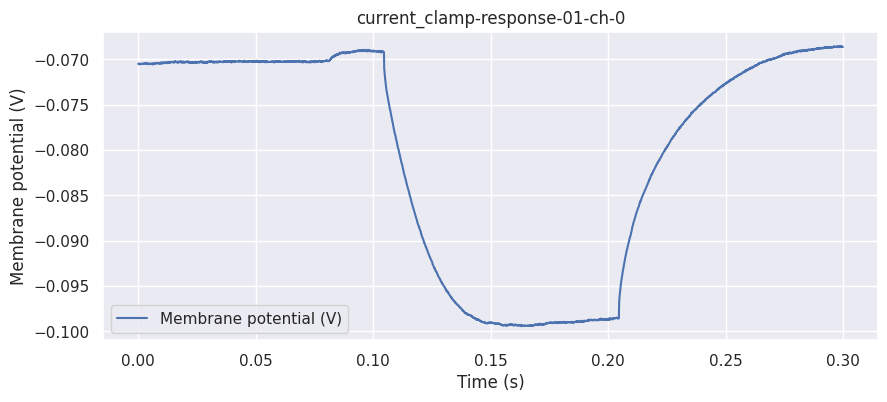

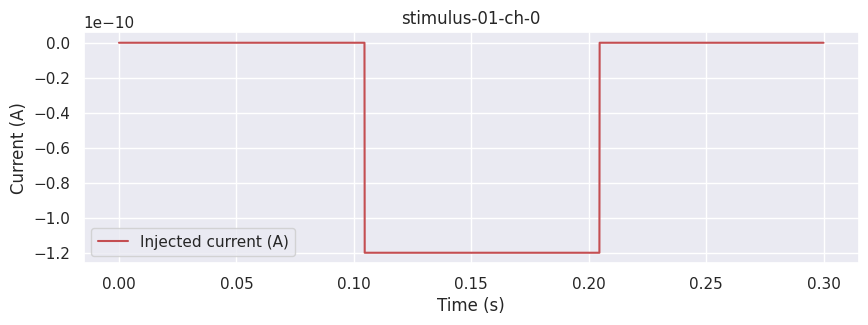

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Select one acquisition and one stimulus key from earlier code output
resp_key = "current_clamp-response-01-ch-0"
stim_key = "stimulus-01-ch-0"

current = nwb.acquisition[resp_key]
stimulus = nwb.stimulus[stim_key]

# Load small amount of data for demonstration (all 3000 samples here, which is small)
data = current.data[:]
stim = stimulus.data[:]
rate = current.rate # Hz
t = np.arange(len(data)) / rate

plt.figure(figsize=(10, 4))
plt.plot(t, data * current.conversion, label="Membrane potential (V)")
plt.xlabel("Time (s)")
plt.ylabel("Membrane potential (V)")
plt.title(f"{resp_key}")
plt.legend()
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(t, stim * stimulus.conversion, 'r', label="Injected current (A)")
plt.xlabel("Time (s)")
plt.ylabel("Current (A)")
plt.title(f"{stim_key}")
plt.legend()
plt.show()

## 4. Accessing Tabular Metadata

NWB files often contain additional metadata in table format, such as the `icephys_simultaneous_recordings` and `icephys_sequential_recordings`.  
Below, we show the first few rows of these tables (if present) to help users see what metadata is available.

In [5]:
# Simultaneous recordings table
try:
    df_simultaneous = nwb.icephys_simultaneous_recordings.to_dataframe()
    print("icephys_simultaneous_recordings table:")
    display(df_simultaneous.head())
except Exception as e:
    print("Could not load icephys_simultaneous_recordings table:", e)

# Sequential recordings table
try:
    df_sequential = nwb.icephys_sequential_recordings.to_dataframe()
    print("icephys_sequential_recordings table:")
    display(df_sequential.head())
except Exception as e:
    print("Could not load icephys_sequential_recordings table:", e)

icephys_simultaneous_recordings table:


,recordings
id,
0,electrodes \ ...
1,electrodes \ ...
2,electrodes \ ...
3,electrodes \ ...
4,electrodes \ ...


icephys_sequential_recordings table:


,simultaneous_recordings,stimulus_type
id,,
0,rec...,"episodic stimulation, 1s steps, 20pA increment..."
1,rec...,"episodic stimulation, 10* 1Hz laser pulses, 5m..."
2,rec...,"episodic stimulation, 1 laser pulse, 5ms width..."
3,rec...,"episodic stimulation, 1 laser pulse, 5ms width..."
4,rec...,"episodic stimulation, 8*30Hz laser pulses, 5ms..."


## 5. Example: Visualizing Multiple Responses

For illustration, let's plot multiple current clamp responses from several channels/episodes. This gives a sense of variability and structure in the responses.

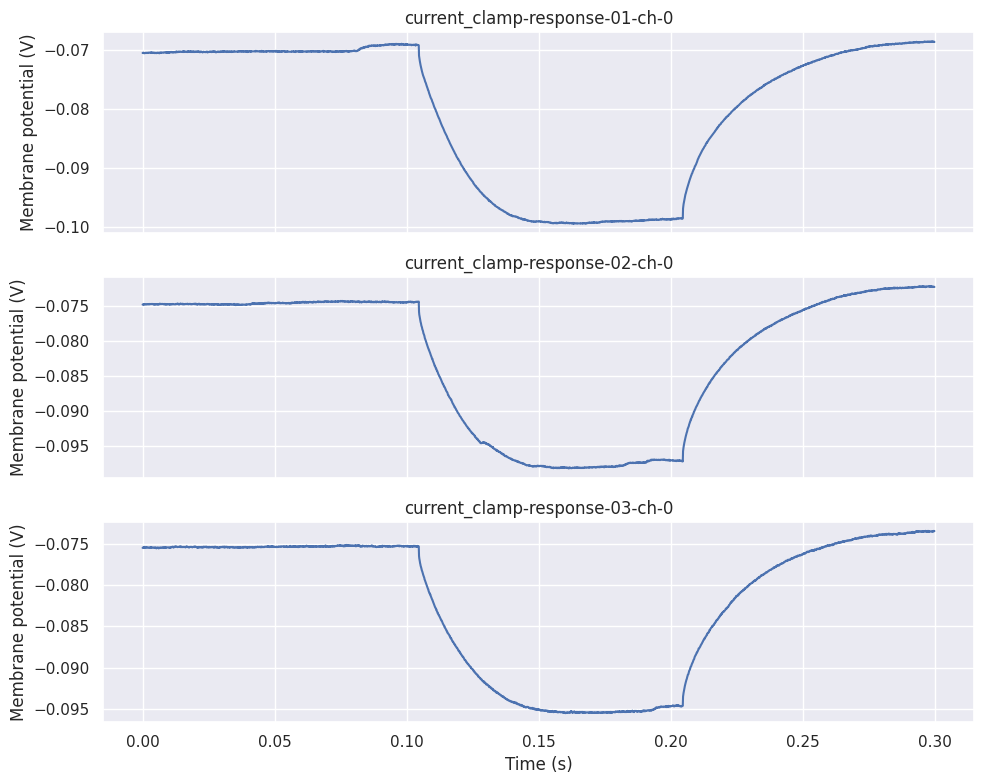

In [6]:
# Plot a few responses (here, responses 1-3 for ch-0)
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
for i in range(3):
    key = f"current_clamp-response-0{i+1}-ch-0"
    cc = nwb.acquisition.get(key, None)
    if cc is not None:
        d = cc.data[:]
        t = np.arange(len(d)) / cc.rate
        axs[i].plot(t, d * cc.conversion)
        axs[i].set_title(f"{key}")
        axs[i].set_ylabel("Membrane potential (V)")
axs[-1].set_xlabel("Time (s)")
plt.tight_layout()
plt.show()

## 6. Summary and Future Directions

In this notebook, we've:
- Demonstrated how to connect to a Dandiset and list available assets
- Loaded NWB files directly from the DANDI archive using PyNWB and remfile/h5py
- Inspected acquisition and stimulus series and explored some electrophysiological response data
- Shown how to access tabular metadata

**Possible next steps:**
- Explore additional NWB files and other recording modalities (e.g., imaging data, videos)
- Compare responses across cell types, slices, or conditions
- Analyze voltage-clamp series if present
- Integrate data with other tools or statistical packages for deeper analyses

**Remember:** Always critically evaluate code and results, especially since this notebook was AI-generated and not fully verified by an expert!